# A quick exploration of results

In [1]:
import os
import pandas as pd
from glob import glob
import seaborn as sns
import numpy as np

In [2]:
xgb_res_files = glob("/drive3/nphill22/projects/corsello_lab/20250525_manuscript/data/output/full/primary/*/xgboost_model/model_performance_summary.csv")
rf_res_files = glob("/drive3/nphill22/projects/corsello_lab/20250525_manuscript/data/output/full/primary/*/random_forest/model_performance_summary.csv")
linear_res_files = glob("/drive3/nphill22/projects/corsello_lab/20250525_manuscript/data/output/full/primary/*/linear_model/model_performance_summary.csv")
quantile_res_files = glob("/drive3/nphill22/projects/corsello_lab/20250525_manuscript/data/output/full/primary/*/quantile_regression/model_performance_summary.csv")


xgb_df = []
rf_df = []
linear_df = []
quantile_df = []

def load_res_files(res_files):
    df = []
    for res_file in res_files:
        df.append(pd.read_csv(res_file))
    # filter to just fold == "overall"
    df = pd.concat(df)
    df = df.loc[df.fold == "overall"]
    return df

xgb_df = load_res_files(xgb_res_files)
rf_df = load_res_files(rf_res_files)
linear_df = load_res_files(linear_res_files)
quantile_df = load_res_files(quantile_res_files)

In [3]:
rf_df = rf_df.loc[:, ["test_pearson", "drug_name", "response_name"]]
rf_df["model"] = "rf"
linear_df = linear_df.loc[:, ["test_pearson", "drug_name", "response_name"]]
linear_df["model"] = "linear"
xgb_df = xgb_df.loc[:, ["test_pearson", "drug_name", "response_name"]]
xgb_df["model"] = "xgb"
quantile_df = quantile_df.loc[:, ["test_pearson", "drug_name", "response_name"]]
quantile_df["model"] = "quantile"

df = pd.concat([rf_df, linear_df, xgb_df, quantile_df])

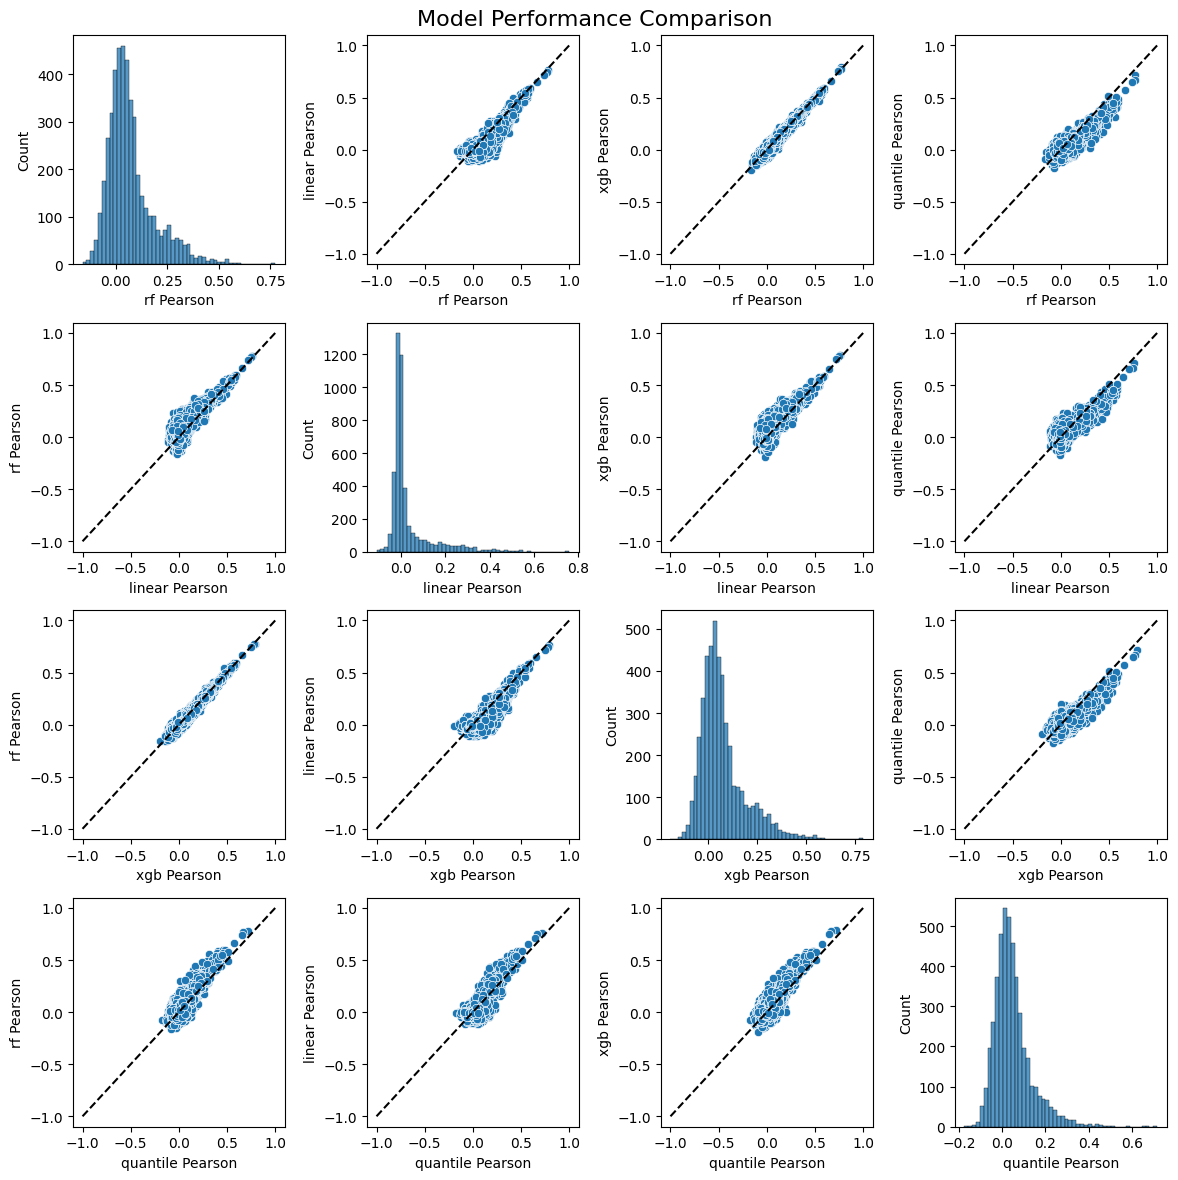

In [4]:
# Create a 3x3 grid of plots
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle('Model Performance Comparison', fontsize=16)

# Get unique models
models = df['model'].unique()

# Create scatter plots for off-diagonal elements
for i, model1 in enumerate(models):
    for j, model2 in enumerate(models):
        x = df.loc[df['model'] == model1, 'test_pearson'].values
        y = df.loc[df['model'] == model2, 'test_pearson'].values
        tmp_df = pd.DataFrame({'x': x, 'y': y})
        if i != j:
            # Create scatter plot
            sns.scatterplot(
                data=tmp_df,
                x='x',
                y='y',
                ax=axes[i, j]
            )
            # plot an x = y line
            axes[i, j].plot([-1, 1], [-1, 1], 'k--')
            axes[i, j].set_xlabel(f'{model1} Pearson')
            axes[i, j].set_ylabel(f'{model2} Pearson')
        else:
            # Create histogram for diagonal elements
            sns.histplot(
                data=df[df['model'] == model1],
                x='test_pearson',
                ax=axes[i, j],
                bins=50
            )
            axes[i, j].set_xlabel(f'{model1} Pearson')
            axes[i, j].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [7]:
df.sort_values(by="test_pearson", ascending=False).head(50)

,test_pearson,drug_name,response_name,model
10,0.791858,idasanutlin,BRD-K62627508-001-01-5,xgb
10,0.775014,AMG_232,BRD-K64925568-001-01-8,xgb
10,0.774818,idasanutlin,BRD-K62627508-001-01-5,rf
10,0.771473,AMG_232,BRD-K64925568-001-01-8,rf
10,0.759573,idasanutlin,BRD-K62627508-001-01-5,linear
10,0.749895,CGM097,BRD-K79584249-001-01-3,xgb
10,0.745010,AMG_232,BRD-K64925568-001-01-8,linear
10,0.741620,CGM097,BRD-K79584249-001-01-3,rf
10,0.715604,idasanutlin,BRD-K62627508-001-01-5,quantile
10,0.712862,CGM097,BRD-K79584249-001-01-3,linear
